In [3]:
import numpy as np


def exists(val):
    # 判断是否存在
    return val is not None

def default(val, d):
    # 当val存在时，则返回val, 否则返回d
    return val if exists(val) else d

In [4]:
# 减少重复计算开销
def cache_fn(f):
    cache = None
    @wraps(f)
    def cached_fn(*args, _cache = True, **kwargs):
        if not _cache:
            return f(*args, **kwargs)
        nonlocal cache
        if cache is not None:
            return cache
        cache = f(*args, **kwargs)
        return cache
    return cached_fn

1

In [8]:
import torch
import torch.nn as nn
from einops.layers.torch import Rearrange

Rearrange_ = Rearrange(pattern='b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=32, p2=32)
x = torch.rand(size=(32, 48, 128, 128))

Rearrange_(x).shape

torch.Size([32, 16, 49152])

In [9]:
x = x.transpose(-2, -1)

In [28]:
y = torch.rand(size=(16, 48, 128, 128))

In [31]:
Rearrange_ = Rearrange(pattern='b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=32, p2=16)

In [32]:
Rearrange_(y).shape

torch.Size([16, 32, 24576])

In [33]:
a = [1,2,34]

for i, j in enumerate(reversed(a)):
    print(i, j)

0 34
1 2
2 1


In [66]:
import torch.nn as nn

In [67]:
import torch

In [70]:
a = torch.rand(size=(32, 3, 256, 256))

In [71]:
net = nn.Conv2d(in_channels=3, out_channels=64,
                stride=(2,2), kernel_size=(3,3), padding='valid')

In [72]:
b = net(a)
print(b.shape)

torch.Size([32, 64, 127, 127])


In [73]:
net_ = nn.Conv2d(in_channels=64, out_channels=128, stride=(2,2), kernel_size=(3,3))

In [74]:
net_(b).shape

torch.Size([32, 128, 63, 63])

In [79]:
c = net_(b)

In [77]:
net_3 = nn.Conv2d(in_channels=128, out_channels=256, stride=(2,2), kernel_size=(3,3))

In [80]:
d = net_3(c)

In [81]:
d.shape

torch.Size([32, 256, 31, 31])

In [84]:
net_linear = nn.Linear(in_features=31, out_features=128)

In [85]:
net_linear(d).shape

torch.Size([32, 256, 31, 128])

In [115]:
a = torch.rand(size=(32, 3, 256, 256))

In [122]:
conv_1 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=64, stride=(1,1), kernel_size=(3,3), padding='same'),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

conv_2 = nn.Sequential(
    nn.Conv2d(in_channels=64, out_channels=128, stride=(1,1), kernel_size=(3,3), padding='same'),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

conv_3 = nn.Sequential(
    nn.Conv2d(in_channels=128, out_channels=256, stride=(1,1), kernel_size=(3,3), padding='same'),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [123]:
a.shape

torch.Size([32, 3, 256, 256])

In [124]:
b=conv_1(a)

In [125]:
c = conv_2(b)

In [126]:
d = conv_3(c)

In [127]:
print(a.shape, b.shape, c.shape, d.shape)

torch.Size([32, 3, 256, 256]) torch.Size([32, 64, 128, 128]) torch.Size([32, 128, 64, 64]) torch.Size([32, 256, 32, 32])


In [ ]:
# Encoder


In [4]:
import torch
import torch.nn.functional as F

x = torch.randn(32, 512, 16, 16)
x_upsampled = F.interpolate(x, size=(32, 32), mode='bilinear', align_corners=True)[:, :256, :, :]
print(x_upsampled.shape[0])
# 输出：torch.Size([32, 256, 32, 32])

32


In [43]:
import cv2
import matplotlib.pyplot as plt
image = r'./TransUnet/Image/Picture/000.jpg'
label = r'./TransUnet/Image/Label/000.png'

Text(0.5, 1.0, 'Label')

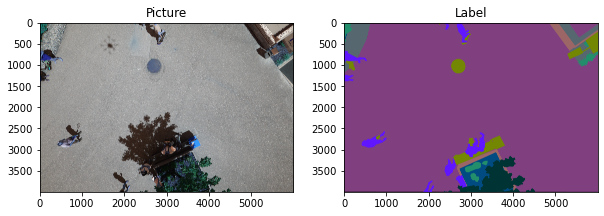

In [44]:
image = cv2.imread(image)
label = cv2.imread(label)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
# ax1.imshow(np.asarray(label), alpha=0.1)
ax1.set_title('Picture')
ax2.imshow(label)
ax2.set_title('Label')

In [45]:
label = torch.tensor(label, dtype=torch.long)

In [60]:
label[0,0,:]

tensor([0, 0, 0])

In [26]:
label = torch.rand(size=(16, 23, 128, 128))

In [50]:
label.argmax(dim=-1)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [18]:
import torch.nn.functional as F
import torch.nn as nn
import torch
# 定义交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 输入数据
inputs = torch.randn(1, 3, 256, 256)
# 真实标签
labels = torch.tensor([[[0, 1, 1], [1, 0, 0], [0, 1, 0]]], dtype=torch.long)

# 前向传播
# outputs = model(inputs)
# 计算损失
# loss = criterion(outputs, labels)

In [19]:
labels.shape

torch.Size([1, 3, 3])

In [24]:
a = torch.rand(size=(16, 23, 128, 256))
b = torch.rand(size=(16, 128, 256))

In [25]:
criterion(a, b)

RuntimeError: "log_softmax" not implemented for 'Long'

In [63]:
mask = r'./TransUnet/Image/Mask/000.png'

In [64]:
import cv2
import torch
mask = cv2.imread(mask)

In [18]:
torch.argmax(torch.tensor(mask), dim=-1)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [ ]:
def show(image, num_class):
    label_colors = np.array([(0, 0, 0),  # 0=background
                             # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                             (128, 64, 128), (130, 76, 0), (0, 102, 0), (112, 103, 87), (28, 42, 168),
                             # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                             (48, 41, 30), (0, 50, 89), (107, 142, 35), (70, 70, 70), (102, 102, 156),
                             # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                             (254, 228, 12), (254, 148, 12), (190, 153, 153), (153, 153, 153), (255, 22, 96),
                             # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                             (102, 51, 0), (9, 143, 150), (119, 11, 32), (51, 51, 0), (190, 250, 190),
                             # 21=ar-marker 22=obstacle  23=conflicting
                             (112, 150, 146), (2, 135, 115), (255, 0, 0)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, num_class):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

In [89]:
label

tensor([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [128,  64, 128],
         [128,  64, 128],
         [128,  64, 128]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [128,  64, 128],
         [128,  64, 128],
         [128,  64, 128]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [127]:
from torchvision.transforms import Compose, ToTensor, Resize, Normalize

compose = Compose([ToTensor(), Resize((128, 256))])

label = cv2.imread(r'./TransUnet/Image/Label/000.png')
label = torch.tensor(cv2.resize(label, (256, 128)))

label[0,0,:]

tensor([ 35, 142, 107], dtype=torch.uint8)

In [131]:
import numpy as np
def change(height, width, image):
    new_image = np.zeros(shape=(height, width))
    colors_list = [# (0, 0, 0),  # 0=background
                 # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                 (128, 64, 128), (130, 76, 0), (0, 102, 0), (112, 103, 87), (28, 42, 168),
                 # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                 (48, 41, 30), (0, 50, 89), (107, 142, 35), (70, 70, 70), (102, 102, 156),
                 # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                 (254, 228, 12), (254, 148, 12), (190, 153, 153), (153, 153, 153), (255, 22, 96),
                 # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                 (102, 51, 0), (9, 143, 150), (119, 11, 32), (51, 51, 0), (190, 250, 190),
                 # 21=ar-marker 22=obstacle  23=conflicting
                 (112, 150, 146), (2, 135, 115), (255, 0, 0)]
    for i in range(height):
        for j in range(width):
            if torch.tensor(image[i,j,:]) in colors_list:
                print(image[i,j,:])
                new_image[i,j] = colors_list.index(image[i,j,:])
    return new_image

new_label = change(height=128, width=256, image=label)

C:\Users\1\AppData\Local\Temp\ipykernel_17600\1731802956.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if torch.tensor(image[i,j,:]) in colors_list:


In [135]:
new_label.max()

0.0

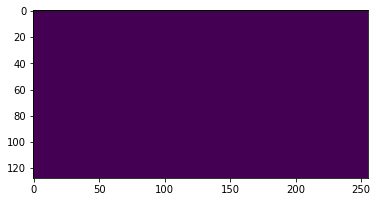

In [134]:
plt.imshow(new_label)

In [108]:
label[127, 150,:]

tensor([0.0000, 0.2000, 0.2000])

In [2]:
import cv2

img = cv2.imread(r'TransUnet/image/train/train-org-img/6344.jpg')

In [3]:
img.shape

(3000, 4000, 3)

In [17]:
label = cv2.imread(r'TransUnet/image/train/train-label-img/6279_lab.png', cv2.IMREAD_GRAYSCALE)

In [19]:
label[0:10,0:10]

array([[6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]], dtype=uint8)

In [31]:
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, ToPILImage, PILToTensor


transformers = Compose([
    ToPILImage(), 
    PILToTensor(), 
    Resize((128, 256)),
    # Normalize(0, 1/255)
])

In [34]:
transformers(label)[0:10,0:10]

tensor([[[6, 6, 6,  ..., 9, 9, 9],
         [6, 6, 6,  ..., 9, 9, 9],
         [6, 6, 6,  ..., 9, 9, 9],
         ...,
         [6, 6, 6,  ..., 9, 9, 9],
         [6, 6, 6,  ..., 9, 9, 9],
         [6, 6, 6,  ..., 9, 9, 9]]], dtype=torch.uint8)

In [8]:
import numpy as np

matrix = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,5]
])

c = np.zeros_like(matrix)

In [9]:
b = [100, 99, 98, 97, 96, 95]

In [10]:
for i in range(0, len(b)):
    idx = matrix == i
    print(idx)


[[False False False False]
 [False False False False]
 [False False False False]]
[[ True False False False]
 [False False False False]
 [False False False False]]
[[False  True False False]
 [ True False False False]
 [False False False False]]
[[False False  True False]
 [False  True False False]
 [ True False False False]]
[[False False False  True]
 [False False  True False]
 [False  True False False]]
[[False False False False]
 [False False False  True]
 [False False  True  True]]


In [8]:
def aS(a, b, c=None):
    if not c:
        print(a,b,c)
aS(1,2,3)


In [9]:
import torch
import torch.nn as nn

a = torch.rand(size=(16, 32, 64, 128))

In [10]:
net = nn.Upsample(scale_factor=2, mode='bilinear')
b = net(a)

In [11]:
b.shape

torch.Size([16, 32, 128, 256])

In [12]:
a

tensor([[[[6.2467e-02, 7.7559e-01, 7.5652e-01,  ..., 1.4203e-01,
           7.4565e-02, 1.0441e-01],
          [4.7124e-01, 2.4700e-01, 1.3965e-01,  ..., 9.4997e-01,
           7.6073e-01, 5.6574e-01],
          [7.6985e-01, 2.3090e-01, 7.6196e-01,  ..., 1.1826e-01,
           7.2398e-01, 3.5588e-01],
          ...,
          [5.6791e-01, 1.9867e-01, 5.7635e-01,  ..., 6.0154e-01,
           8.1504e-01, 2.0793e-01],
          [8.5724e-01, 4.0357e-01, 5.3238e-02,  ..., 6.9366e-01,
           9.8698e-01, 6.5280e-01],
          [8.7125e-01, 9.6729e-01, 2.2833e-01,  ..., 1.3323e-01,
           5.7132e-01, 9.4722e-01]],

         [[2.7652e-01, 1.4083e-01, 5.7986e-01,  ..., 9.8531e-01,
           4.7090e-01, 5.6883e-01],
          [4.3372e-01, 7.8200e-01, 5.0952e-01,  ..., 2.3277e-01,
           7.0138e-01, 6.7316e-01],
          [8.5176e-02, 6.4031e-01, 8.5914e-01,  ..., 6.5693e-01,
           9.8208e-01, 5.2345e-01],
          ...,
          [6.0781e-02, 1.4620e-02, 2.3018e-01,  ..., 9.0068

In [13]:
b

tensor([[[[6.2467e-02, 2.4075e-01, 5.9731e-01,  ..., 8.2026e-02,
           9.6949e-02, 1.0441e-01],
          [1.6466e-01, 2.8435e-01, 5.2375e-01,  ..., 2.3952e-01,
           2.2633e-01, 2.1974e-01],
          [3.6905e-01, 3.7157e-01, 3.7662e-01,  ..., 5.5449e-01,
           4.8510e-01, 4.5041e-01],
          ...,
          [8.6074e-01, 7.8168e-01, 6.2356e-01,  ..., 8.4390e-01,
           7.6557e-01, 7.2640e-01],
          [8.6775e-01, 8.5740e-01, 8.3671e-01,  ..., 7.2483e-01,
           8.2402e-01, 8.7361e-01],
          [8.7125e-01, 8.9526e-01, 9.4328e-01,  ..., 6.6530e-01,
           8.5324e-01, 9.4722e-01]],

         [[2.7652e-01, 2.4260e-01, 1.7476e-01,  ..., 4.9539e-01,
           5.4435e-01, 5.6883e-01],
          [3.1582e-01, 3.1215e-01, 3.0480e-01,  ..., 5.4512e-01,
           5.7832e-01, 5.9491e-01],
          [3.9442e-01, 4.5124e-01, 5.6489e-01,  ..., 6.4459e-01,
           6.4625e-01, 6.4708e-01],
          ...,
          [3.8433e-01, 4.6563e-01, 6.2823e-01,  ..., 4.9857